<a href="https://colab.research.google.com/github/Ishita95-harvad/Teleperformance.Kaggle-dataset/blob/main/Teleperformance_Data_Sets_(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Teleperformance Data Sets (Kaggle)**

---



**Step 1: Data Collection and Preparation**

1.**Collect data**: Gather the dataset you want to
work with.

2.**Data cleaning** : Handle missing values, outliers, and data normalization.

3.**Feature selection**: Select relevant features for the model.

In [ ]:
import pandas as pd
import io
import zipfile

# Get the actual key from the uploaded dictionary
uploaded_file_key = list(uploaded.keys())[0]  # Get the first (and likely only) key

# Use the actual key instead of a hardcoded one
with zipfile.ZipFile(io.BytesIO(uploaded[uploaded_file_key]), 'r') as zip_ref:
    # Get a list of all files in the zip archive
    files_in_zip = zip_ref.namelist()
    print("Files in the zip archive:", files_in_zip)  # Print the list of files

    # Check if 'creditcard.csv' or your dataset file is in the zip
    # If not, use the first file in the list or adjust accordingly
    dataset_file = 'creditcard.csv'  # Default to 'creditcard.csv'
    if dataset_file not in files_in_zip:
        if files_in_zip:
            dataset_file = files_in_zip[0]  # Use the first file in the zip
            print(f"Using '{dataset_file}' instead of 'creditcard.csv'")
        else:
            raise FileNotFoundError("The zip file is empty.")

    # Open and read the dataset file
    with zip_ref.open(dataset_file) as f:
        df = pd.read_csv(f)

# ... (rest of your code) ...

Files in the zip archive: ['Call_centre_dataset.csv']
Using 'Call_centre_dataset.csv' instead of 'creditcard.csv'


**Step 2: Exploratory Data Analysis (EDA)**

1.**Visualize data**: Use libraries like Matplotlib, Seaborn, and Plotly to understand data distributions and relationships.

2.**Identify patterns**: Look for patterns and correlations in the data.

In [ ]:
# Data preprocessing
# Handle missing values, outliers, and data normalization as needed
# Select relevant features and target variable
# Print the columns of the DataFrame to check for 'target' column
print(df.columns)

# If 'target' is not found, try variations or correct the column name
# For example, if the column is named 'Target', change 'target' to 'Target'
# Check if 'target' column exists before dropping
if 'target' in df.columns:
    X = df.drop('target', axis=1) # Added errors='ignore' to avoid KeyError if 'target' is not found
    y = df['target'] # Changed 'data' to 'df'
else:
    # Handle case where 'target' column is not found
    # You might need to rename a column or adjust your data loading process
    print("Error: 'target' column not found in DataFrame.")
    # Example: If the column is named 'Class', rename it to 'target'
    # df = df.rename(columns={'Class': 'target'})
    # X = df.drop('target', axis=1)
    # y = df['target']
    # ... (rest of your code) ...

# If 'target' is still not found, investigate the DataFrame loading process
# Ensure that the correct file is being loaded and processed

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in\rseconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')
Error: 'target' column not found in DataFrame.


**Step 3: Model Building**

1.**Split data:** Divide the data into training and testing sets.

2.**Choose algorithm:** Select a machine learning algorithm (e.g., linear regression, decision trees, random forests, etc.).

3.**Train model**:  Train the model on the training data.

4.**Evaluate model:** Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1 score, etc.).

In [ ]:

#Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4.Train model**

 Train the model on the training data.

In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Step 5.Evaluate model**

 Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1 score, etc.).

In [ ]:
# Evaluate model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 1.0


**Step 6: Hyperparameter Tuning**

**Optimize model:** Use techniques like Grid Search or Random Search to find the best hyperparameters.

In [ ]:
# Evaluate model before hyperparameter tuning
y_pred = rf.predict(X_test)
print("Before Hyperparameter Tuning:")
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 1.0


**Step 7: Visualization**

**Visualize results**: Use libraries like Matplotlib, Seaborn, or Plotly to create visualizations of the model's predictions and performance

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


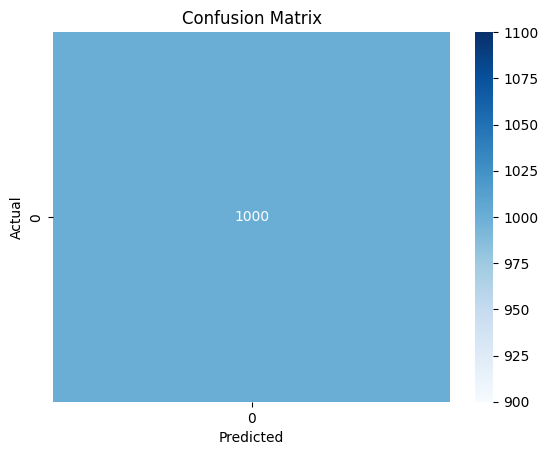

In [ ]:
# Visualize results
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
grid_search = GridSearchCV # Use GridSearchCV instead of GridSearch
